<a href="https://colab.research.google.com/github/elishagretton/Modelling-Biological-Switches/blob/main/Model_(2)_Delay_model_using_DDEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Delay Differential Equations
* We adjust the deterministic model to consider additional factors that reflect the complexity of biological systems.
* One factor that is now included in the model is the concept of a delayed reaction.
* Not all reactions occur immediately and instead, the reaction is delayed by a set amount of time.
* This delayed response causes the interactions to change in the system, and consequently causes alternative behaviour.

# Setting up the Environment

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import pylab as p

In [ ]:
from scipy.integrate import odeint
from google.colab import files
from matplotlib.lines import Line2D

from pylab import cos, linspace, subplots
from ddeint import ddeint

# Define Hill function, deterministic model from prev

In [ ]:
def f(X, theta, n):
  """
  Hill function.

  Params:
  X: list of floats, concentration of cell X
  theta: float, the value of X at which f(X) = 0.5
  n: int, sensitivity of production function.

  """
  return 1/(1+pow((X/theta),n))

In [ ]:
def dZ_dt(Z, ts, f, mu=1, theta=0.1, n=3):
  """
  Ordinary differential equation system for a biological switch.

  Params:
  Z: list of floats, initial condition for cell X and Y.
  ts: list of int, time taken.
  f: func, rate of production between cells.
  mu: float, positive decay constant to describe the rate of degradation of each cell.
  theta: float, the value of X at which f(X) = 0.5.
  n: int, sensitivity of production function.
  """
  X, Y = Z[0], Z[1]
  dxdt, dydt = -mu*X + f(Y,theta,n), -mu*Y + f(X,theta,n)
  return [dxdt, dydt]

# Define delay model

In [ ]:
# Install ddeint
!pip install ddeint

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ddeint: filename=ddeint-0.2-py3-none-any.whl size=3976 sha256=e139464d613b2d83de0f527f81690b1a5cb3658ada32571ce98db92723d9ec8a
  Stored in directory: /root/.cache/pip/wheels/42/22/a4/feade4432f00759056cbd3d9a72c7db93e96109b33bd13c8ef
Successfully built ddeint


In [ ]:
# Define delay model
def delay_model(Z,ts,tau,f):
    X, Y = Z(ts)
    xd,yd = Z(ts-tau)
    dx = -mu*X + f(yd, theta,n)
    dy = -mu*Y + f(xd, theta,n)
    return [dx,dy]

# Plotting DDE model - general observations

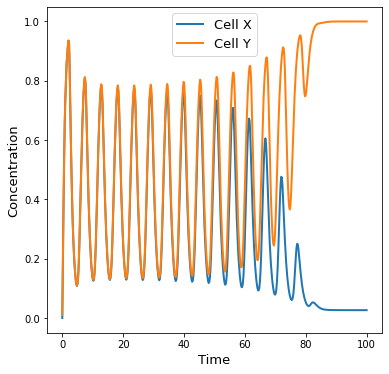

In [ ]:
# Define initial conditions and parameters
xy = lambda t : np.array([0,0.01])
ts = np.linspace(0, 100, 500)

mu = 1
theta = 0.3
n = 3

# Introduce the delay
tau = 2

# Run simulation
yy = ddeint(delay_model,xy,ts,fargs=(tau,f,))

# Plot simulation
fig = plt.figure()
fig.set_size_inches(6,6)
plt.plot(ts,yy[:,0],lw=2, label='Cell X')
plt.plot(ts,yy[:,1],lw=2, label ='Cell Y')
plt.xlabel('Time',fontsize=13)
plt.ylabel('Concentration',fontsize=13)
plt.legend(fontsize=13)

Observations:
* The behaviour changes.
* Now, there are oscillatory trajectories in the concentration of both cells till switching occurs.

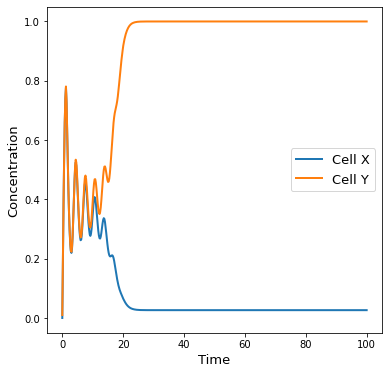

In [ ]:
# Decreasing time-delay to 1
# Define initial conditions and parameters
xy = lambda t : np.array([0,0.01])
ts = np.linspace(0, 100, 500)

mu = 1
theta = 0.3
n = 3

# Introduce the delay
tau = 1

# Run simulation
yy = ddeint(delay_model,xy,ts,fargs=(tau,f,))

# Plot simulation
fig = plt.figure()
fig.set_size_inches(6,6)
plt.plot(ts,yy[:,0],lw=2, label='Cell X')
plt.plot(ts,yy[:,1],lw=2, label ='Cell Y')
plt.xlabel('Time',fontsize=13)
plt.ylabel('Concentration',fontsize=13)
plt.legend(fontsize=13)

* When decrease time delay, switching time decreases and oscillations are shorter.

# Investigating how time delay effects switching time

We plot |Y-X| of the same model with increasing time-delay.

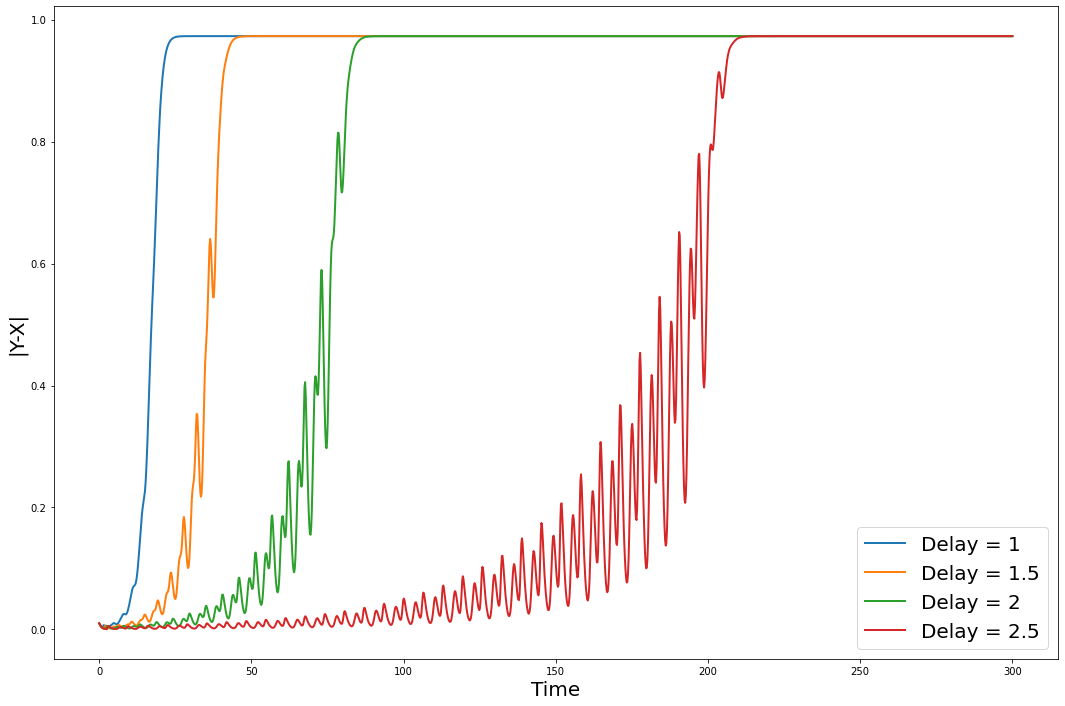

In [ ]:
xy = lambda t : np.array([0,0.01])
ts = np.linspace(0, 300, 1500)
mu = 1
theta = 0.3
n = 3

# Introduce the delay
tau = 1

# Run simulation
yy = ddeint(delay_model,xy,ts,fargs=(tau,f,))

# Plot simulation
fig = plt.figure()
fig.set_size_inches(18,12)

plt.plot(ts,abs(yy[:,1]-yy[:,0]),lw=2,label='Delay = 1')

tau = 1.5
yy = ddeint(delay_model,xy,ts,fargs=(tau,f,))
plt.plot(ts,abs(yy[:,1]-yy[:,0]),lw=2,label='Delay = 1.5')

tau = 2
yy = ddeint(delay_model,xy,ts,fargs=(tau,f,))
plt.plot(ts,abs(yy[:,1]-yy[:,0]),lw=2,label='Delay = 2')

tau = 2.5
yy = ddeint(delay_model,xy,ts,fargs=(tau,f,))
plt.plot(ts,abs(yy[:,1]-yy[:,0]),lw=2,label='Delay = 2.5')

plt.xlabel('Time',fontsize=20)
plt.ylabel('|Y-X|',fontsize=20)
plt.legend(prop={"size":20},markerscale=1)

The duration of oscillations increase with increasing τ.
* As τ gets larger, more oscillations occur till equilibrium
is reached.
* As τ increases, the duration of oscillations increase.
